In [5]:
!pip install cobra
import cobra

In [6]:
model = cobra.io.load_model("iJO1366")

# **Minimal Media Analysis**

In some cases you might be interested in the smallest growth medium that can maintain a specific growth rate, the so called “minimal medium”. For this we provide the function minimal_medium which by default obtains the medium with the lowest total import flux. This function needs two arguments: the model and the minimum growth rate (or other objective) the model has to achieve.

In [7]:
model.medium
# This gives you a dictionary with the import reaction and its upper flux boundary.
# Any rxn with a zero upper bound is not shown.
# you can shot off oxygen (making the rxn anaerobic as follows):

{'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_o2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [8]:
medium = model.medium
medium["EX_o2_e"] = 0.0
model.medium = medium

model.medium
# as you can see now, oxygen is not among the reactions with a non-zero upper bound.

{'EX_ca2_e': 1000.0,
 'EX_cbl1_e': 0.01,
 'EX_cl_e': 1000.0,
 'EX_co2_e': 1000.0,
 'EX_cobalt2_e': 1000.0,
 'EX_cu2_e': 1000.0,
 'EX_fe2_e': 1000.0,
 'EX_fe3_e': 1000.0,
 'EX_glc__D_e': 10.0,
 'EX_h_e': 1000.0,
 'EX_h2o_e': 1000.0,
 'EX_k_e': 1000.0,
 'EX_mg2_e': 1000.0,
 'EX_mn2_e': 1000.0,
 'EX_mobd_e': 1000.0,
 'EX_na1_e': 1000.0,
 'EX_nh4_e': 1000.0,
 'EX_ni2_e': 1000.0,
 'EX_pi_e': 1000.0,
 'EX_sel_e': 1000.0,
 'EX_slnt_e': 1000.0,
 'EX_so4_e': 1000.0,
 'EX_tungs_e': 1000.0,
 'EX_zn2_e': 1000.0}

In [18]:
from cobra.medium import minimal_medium

# since we shut off oxygen, let's open it again
medium = model.medium
medium["EX_o2_e"] = 1000.0
model.medium = medium

max_growth = model.slim_optimize() # stores the optimal value
minimal_medium = minimal_medium(model, max_growth)

In [14]:
minimal_medium # this stores the minimum flux of each import reaction to achieve the max_growth rate.
# instead of max_growth, it can be some other maxiumum objective value (for a precursor or some other metabolite)

,0
EX_ca2_e,0.005113
EX_cl_e,0.005113
EX_cobalt2_e,0.000025
EX_cu2_e,0.000697
EX_fe2_e,0.015778
EX_glc__D_e,10.000000
EX_k_e,0.191752
EX_mg2_e,0.008522
EX_mn2_e,0.000679
EX_mobd_e,0.000127


# **Parsimonious FBA**

Parsimonious FBA (often written pFBA) finds a flux distribution which gives the optimal growth rate, but **minimizes the total sum of flux**.

In [20]:
from cobra.flux_analysis import flux_variability_analysis
fba_solution = model.optimize()
pfba_solution = cobra.flux_analysis.pfba(model)

In [21]:
print(fba_solution)
print(pfba_solution)
# the objective evaluation of pfba gives a weird number that's not true
# due to its definition of objective which is different from the definition of the objective in normal FBA
# to get the true objective value, use pfba_solution.fluxes['rxn_name']

<Solution 0.982 at 0x7b0a283677c0>
<Solution 699.022 at 0x7b0a27640d00>


In [33]:
print(fba_solution.fluxes['BIOMASS_Ec_iJO1366_core_53p95M'])
print(pfba_solution.fluxes['BIOMASS_Ec_iJO1366_core_53p95M'])

print(fba_solution.fluxes.sum())
print(pfba_solution.fluxes.sum())

# As you see, they're almost identical. But pfba_solution has a lower sum of fluxes!

0.982371812726983
0.982371812726991
278.69960574472225
217.0050155589294


**Question 1: What does it tell you about the organism's metabolic network if the normal FBA and parominous FBA produce the same sum of fluxes for the same objective value?**

Your answer

# **Flux Sampling**

While flux variability analysis determines the minimum and maximum value of a reaction flux given some network constraints, Monte-Carlo-sampling can be used to determine **a probability flux
distribution for each network reaction**. Therefore, this analysis helps you answer the question of "***how probable is a flux through a reaction?***"

In [34]:
from cobra.sampling import sample
s = sample(model, 100)
s

,DM_4crsol_c,DM_5drib_c,DM_aacald_c,DM_amob_c,DM_mththf_c,DM_oxam_c,BIOMASS_Ec_iJO1366_WT_53p95M,BIOMASS_Ec_iJO1366_core_53p95M,EX_12ppd__R_e,EX_12ppd__S_e,...,XYLUt2pp,XYLUtex,XYLabcpp,XYLt2pp,XYLtex,ZN2abcpp,ZN2t3pp,ZN2tpp,ZNabcpp,Zn2tex
0,2.739926e-10,9.111979e-08,2.031172e-17,2.457333e-12,1.000160e-06,7.803951e-07,9.816370e-07,2.470295e-07,8.052913e-07,5.897251e-07,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000016,0.000016,0.000003,4.022875e-10
1,4.015349e-08,1.259621e-07,2.035662e-17,3.601210e-10,1.161808e-06,7.252580e-07,1.714908e-04,8.569693e-06,3.930378e-05,5.480593e-07,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000014,0.000015,0.000002,5.848529e-08
2,1.545395e-07,2.434727e-07,1.990273e-17,1.386004e-09,9.900894e-07,4.771754e-07,6.774967e-04,1.550554e-05,3.928797e-05,5.419743e-07,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000014,0.000015,0.000002,2.247963e-07
3,2.189385e-07,3.102890e-07,1.932009e-17,1.963574e-09,1.378245e-06,4.780959e-07,9.662814e-04,1.550574e-05,3.928874e-05,5.426688e-07,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000014,0.000015,0.000002,3.183626e-07
4,1.738078e-07,1.819194e-07,-8.221013e-18,1.558814e-09,1.729070e-06,4.775829e-07,7.785314e-04,8.755870e-07,5.321236e-05,5.422798e-07,...,0.0,0.0,0.0,0.0,0.0,0.000003,0.000219,0.000220,0.000002,2.525428e-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2.472534e-06,9.265937e-03,2.481379e-14,2.217520e-08,1.281832e-03,6.952237e-02,1.013259e-02,9.550066e-04,3.766196e-02,2.705564e-02,...,0.0,0.0,0.0,0.0,0.0,1.836618,0.648177,2.279164,0.205634,3.608617e-06
96,2.228335e-06,9.290272e-03,2.477547e-14,1.998507e-08,1.017061e-02,6.967119e-02,9.006667e-03,9.858687e-04,3.776553e-02,2.711746e-02,...,0.0,0.0,0.0,0.0,0.0,1.838189,0.654356,2.286744,0.205805,3.254341e-06
97,1.874205e-06,9.290391e-03,2.719540e-14,1.680901e-08,7.397481e-03,6.967393e-02,7.418472e-03,9.860335e-04,3.776712e-02,2.711854e-02,...,0.0,0.0,0.0,0.0,0.0,1.838252,0.654403,2.286845,0.205812,2.739822e-06
98,4.822052e-06,9.308850e-03,2.768273e-14,4.324710e-08,7.435512e-03,6.976890e-02,8.641235e-03,1.298232e-02,3.783218e-02,2.715782e-02,...,0.0,0.0,0.0,0.0,0.0,1.839360,0.658132,2.291566,0.205933,7.226730e-06


In [70]:
model = cobra.io.load_model("iJO1366")
fva_results = cobra.flux_analysis.flux_variability_analysis(model)

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
flux_prob_data = s

def plot_flux_histogram(reaction_id):

    flux_distribution = flux_prob_data[reaction_id]
    fva_min = fva_results.loc[reaction_id, 'minimum']
    fva_max = fva_results.loc[reaction_id, 'maximum']

    plt.hist(flux_distribution, bins=30, alpha=0.7, color='blue')

    plt.axvline(fva_min, color='red', linestyle='--', linewidth=1, label=f'FVA Min ({fva_min:.2f})')
    plt.axvline(fva_max, color='red', linestyle='--', linewidth=1, label=f'FVA Max ({fva_max:.2f})')

    plt.plot(fva_min, 0, 'ro', markersize=8, label='Min Flux')
    plt.plot(fva_max, 0, 'r*', markersize=8, label='Max Flux')

    plt.xlabel('Flux Value')
    plt.ylabel('Frequency')
    plt.title(f'Flux Distribution for {reaction_id}')
    plt.legend()
    plt.show()

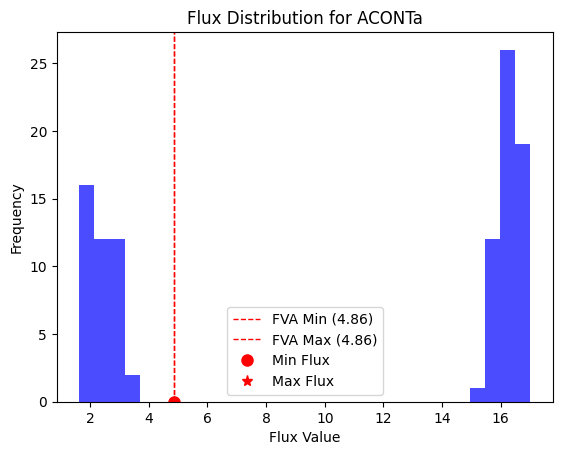

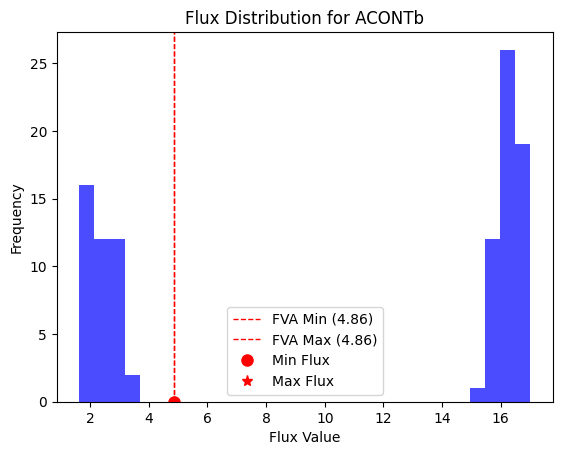

In [88]:
plot_flux_histogram('ACONTa')
plot_flux_histogram('ACONTb')

**Question 2: What do you notice about the two plots for Aconitase A and Acontiase B?**

Your answer

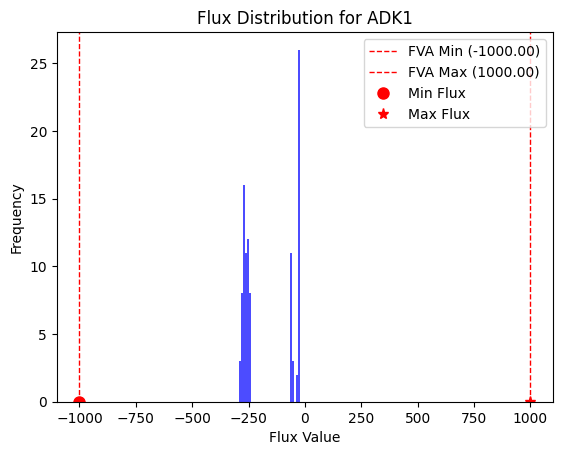

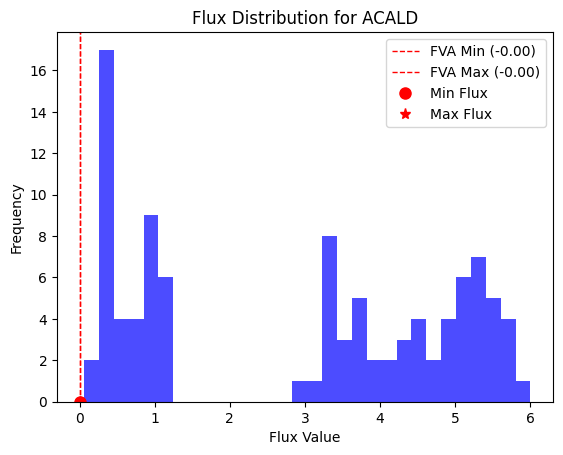

In [89]:
plot_flux_histogram('ADK1')
plot_flux_histogram('ACALD')

We notice that there is no relation between adenylate kinase (ADK1) and acetaldehyde dehydrogenase (ACALD). While this is not interesting, what's interesting are the "correlated reactions". We want to know all the reactions that are perfectly correlated.

In [90]:
def plot_flux_correlation(reaction_id1, reaction_id2, flux_data):
    flux1 = flux_data[reaction_id1]
    flux2 = flux_data[reaction_id2]

    # Plot the scatter plot
    plt.figure(figsize=(6, 6))
    plt.scatter(flux1, flux2, alpha=0.5, color='blue', s=10)

    # Plot formatting
    plt.xlabel(f'Flux of {reaction_id1}')
    plt.ylabel(f'Flux of {reaction_id2}')
    plt.title(f'Flux Correlation between {reaction_id1} and {reaction_id2}')
    plt.grid(True)
    plt.show()

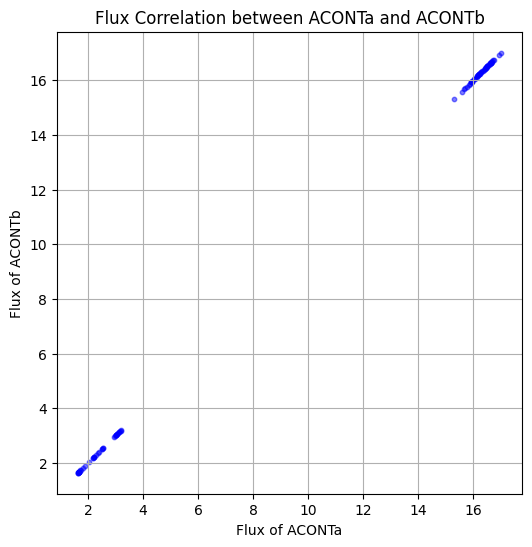

In [91]:
plot_flux_correlation('ACONTa', 'ACONTb', flux_prob_data)

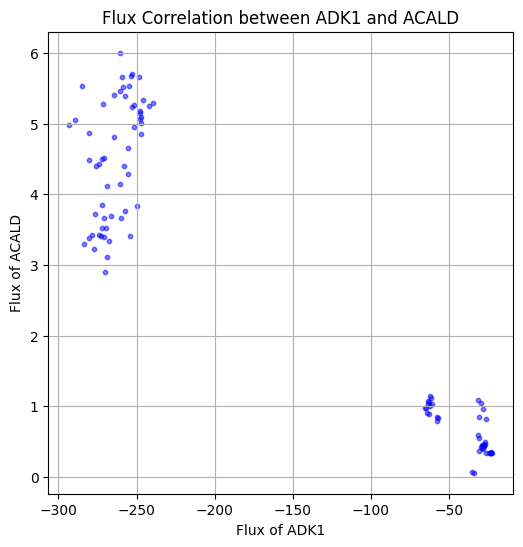

In [93]:
plot_flux_correlation('ADK1', 'ACALD', flux_prob_data)

**Question 3: With a threshold of Pearson correlation coefficient of 0.7, what is the ratio of the high-correlated reaction pairs to the low-correlated reaction pairs?**
Hint: you should calculate the Pearson coefficient for all the reaction pairs, separate those that are >= 0.7 from those that are < 0.7, count each and check their ratio.

**Question 4: What does that ratio tell you about the organism's metabolic flexibility and independence of pathways?**

Your answers